In [2]:
import pandas as pd
import sklearn
import math
import statistics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/data.csv')
data.head()
print(data.shape)

(18207, 89)


In [4]:
count_nan = data.isnull().sum()
count_nan

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [5]:
dataCleaner = data.drop(columns=['ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Skill Moves', 'Body Type', 'Work Rate',
                                 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                                 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
                                 'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB', 'Height', 'Weight', 'Release Clause', 'Name', 
                                 'Unnamed: 0', 'Nationality', 'Club', 'Preferred Foot'])

dataCleaner.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,€110.5M,€565K,5.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,€77M,€405K,5.0,4.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,€118.5M,€290K,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,€72M,€260K,4.0,3.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,€102M,€355K,4.0,5.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
for column in dataCleaner.columns:
    if (dataCleaner[column].isnull().sum() != 0) and ('Release Clause' not in column):
        dataCleaner[column] = dataCleaner.fillna(statistics.median(dataCleaner[column]))

In [7]:
dataCleaner.isnull().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International Reputation    0
Weak Foot                   0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure                   0
Marking   

In [8]:
dataCleaner['Value'] = dataCleaner['Value'].replace('€', '', regex=True)

listValuesK = []
listValuesM = []

for value in dataCleaner['Value']:
    if 'M' in value:
        listValuesM.append(float(value[:-1]))
    elif 'K' in value:
        listValuesK.append(float(float(value[:-1])/1000))
    else:
        listValuesK.append(value)
        
for item in listValuesK:
    listValuesM.append(item)
    
dataCleaner['Value'] = listValuesM

18207


In [9]:
dataCleaner['Wage'] = dataCleaner['Wage'].replace('€', '', regex=True)

listValuesK = []
listValuesM = []

for value in dataCleaner['Wage']:
    if 'M' in value:
        listValuesM.append(float(value[:-1]))
    elif 'K' in value:
        listValuesK.append(float(float(value[:-1])/1000))
    else:
        listValuesK.append(value)
        
for item in listValuesK:
    listValuesM.append(item)
    
print(len(listValuesM))
dataCleaner['Wage'] = listValuesM

18207


In [337]:
x_train, x_test, y_train, y_test = train_test_split(dataCleaner.drop('Overall', axis=1), dataCleaner['Overall'], random_state=97)

In [338]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [339]:
y_pred = regressor.predict(x_test)

In [340]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(25)

,Actual,Predicted
15779,59,59.708686
8319,67,65.374702
10261,65,62.937202
3749,72,75.320991
1518,76,73.828803
16427,57,55.813667
15099,60,59.337593
13652,62,61.084663
8675,67,66.500190
5986,69,66.583686


As we can see, it's easy to predict the overall because it goes in function to other parameters

In [341]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.112569301667546
Mean Squared Error: 7.237783154821149
Root Mean Squared Error: 2.6903128358652175


Let's see if we can predict the value depending on the Overall

In [342]:
dataCleanerLittle = dataCleaner[['Overall', 'Age', 'Value']]
x_train, x_test, y_train, y_test = train_test_split(dataCleanerLittle.drop('Overall', axis=1), dataCleanerLittle['Overall'], random_state=97)

In [343]:
regressor2 = LinearRegression()  
regressor2.fit(x_train, y_train)
y_pred = regressor2.predict(x_test)

In [344]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(25)

,Actual,Predicted
15779,59,66.172514
8319,67,64.042324
10261,65,64.297909
3749,72,71.459269
1518,76,68.149232
16427,57,65.609368
15099,60,61.890536
13652,62,63.092423
8675,67,65.134637
5986,69,66.942866


We can see that the prediction is less accurate with less values

In [345]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.7010409286282595
Mean Squared Error: 22.21830955418425
Root Mean Squared Error: 4.713630188526063


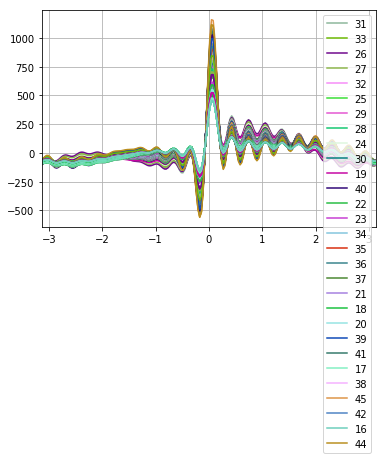

In [346]:
pd.plotting.andrews_curves(dataCleaner.astype(int), 'Age')

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x_train, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Futbolistas')
plt.ylabel('Distancias Euclídeas')
plt.show()

NameError: name 'x_train' is not defined